# **Исследование симптомов ПТСР у пациентов с раком яичников**

Предстоит проанализировать датасет, в котором авторы статьи (статья тут https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0177055#sec019 ) собрали информацию о людях с раком яичников и их психологическом состоянии. Исследование было направлено на оценку распространенности симптомов посттравматического стрессового расстройства у пациенток с раком яичников в Китае, влияние демографических и клинических переменных на симптомы посттравматического стрессового расстройства.

Зависимая переменная - PTSR symptomes- оценка уровня проявления симптомов.

Для успешного выполнения необходимо:
1. Провести EDA анализ датасета. Анализ должен включать не менее 2 графиков, построенных с применением ggplot2.
2. На основе EDA сформулировать гипотезы, которые можно проверить на данном датасете.
3. Построить линейную модель зависимости PTSR symptomes от количественных предикторов. Провести диагностику модели. Сделать выводы о ее качестве, и можно ли ей доверять.
4. Попробовать улучшить модель (до разумного предела).
5. Провести дисперсионный анализ зависимости PTSR symptomes от стадии рака. Сформулировать выводы на основе модели.

Задание необходимо выполнить на R.

# Загрузка и подготовка данных

Загрузим данные и необходимые библиотеки.

In [ ]:
system("sudo apt-get install libgmp-dev")
system("sudo apt-get install libmpfr-dev")

In [ ]:
install.packages(c("car", "caTools", "corrplot", "effsize", "GoodmanKruskal", "ggpubr", "ggstatsplot", "Hmisc", "multcomp", "pwr", "tidyverse", "visreg"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
lapply(c("car", "caTools", "corrplot", "data.table", "dplyr", "effsize", "ggplot2", "ggpubr", "ggstatsplot", "GoodmanKruskal", "Hmisc", "multcomp", "parameters", "pwr", "readxl", "stats", "tidyverse", "visreg"), require, character.only = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

In [ ]:
df_ptsr = read_excel("PTSR.xlsx")

Выведем информацию о данных.

In [ ]:
str(df_ptsr)

tibble [201 × 11] (S3: tbl_df/tbl/data.frame)
 $ Age           : num [1:201] 46 53 58 57 56 56 47 47 51 51 ...
 $ Marital status: chr [1:201] "Married/living with a partner" "Married/living with a partner" "Married/living with a partner" "Married/living with a partner" ...
 $ Education     : chr [1:201] "Junior college or above" "Secondary school" "Secondary school" "Secondary school" ...
 $ Income        : chr [1:201] "2001-3000" "≤2000" "2001-3000" "2001-3000" ...
 $ Cancer stage  : chr [1:201] "Ⅰ" "Ⅱ" "Ⅱ" "Ⅱ" ...
 $ Treatment type: chr [1:201] "No treatment" "No treatment" "No treatment" "No treatment" ...
 $ Metastasis    : chr [1:201] "No" "No" "No" "No" ...
 $ Social support: num [1:201] 30 25 23 21 16 14 15 17 33 31 ...
 $ Hope          : num [1:201] 36 37 34 32 31 33 28 30 37 35 ...
 $ Resilience    : num [1:201] 39 30 42 44 32 30 35 33 53 51 ...
 $ PTSD symptoms : num [1:201] 21 39 35 33 34 32 67 65 35 33 ...


 Датасет содержит демографическую и клиническую информацию о пациентах с раком яичников, собранную в первой и второй больницах Китайского медицинского университета с 1 января 2014 года по 31 декабря 2015 года. Квалифицированные пациенты должны были заполнить Контрольный список посттравматического стрессового расстройства — гражданская версия (PCL-C), Анкету функциональной социальной поддержки Duke-UNC, индекс Херта Хоуп (HHI) и шкалу устойчивости-14 (RS-14).

Датасет состоит из 11 столбцов и включает 201 наблюдение.

Признаки:
- Age (возраст).
 - Marital status (семейное положение): замужем/живет с партнером, одинока/овдовела/разведена.
 - Education (образование): начальная школа, средняя школа, младший колледж или выше.
- Cancer stage (стадия рака): I, II, III, IV.
- Income (доход): ≤2000, 2001–3000, >3000.
 - Treatment type (тип лечения): отсутствие лечения, химиотерапия, хирургическое вмешательство,  комбинированное лечение.
 - Metastasis (метастазы): да, нет.
 - Social support (социальная поддержка): значения от 8 до 40.
 - Hope (надежда): значения от 12 до 48.
- Resilience (устойчивость): значения от 14 до 56.

 Целевая переменная: PTSD symptoms (симптомы ПТСР): количество баллов варьируется от 17 до 85, оценки равные или более 44 считаются признаками симптомов ПТСР.


Проведем разведочный анализ данных.

Проверим пропуски в каждом столбце.

In [ ]:
print(sapply(df_ptsr, function (x) sum(is.na (x))))

           Age Marital status      Education         Income   Cancer stage 
             0              0              0              0              0 
Treatment type     Metastasis Social support           Hope     Resilience 
             0              0              0              0              0 
 PTSD symptoms 
             0 


Пропуски отсутствуют. Проверим количество уникальных значений в каждом столбце  таблицы.

In [ ]:
print(rapply(df_ptsr,function(x)length(unique(x))))

           Age Marital status      Education         Income   Cancer stage 
            43              2              3              3              3 
Treatment type     Metastasis Social support           Hope     Resilience 
             4              2             29             23             34 
 PTSD symptoms 
            42 


Переименуем некоторые столбцы для дальнейшей работы.

In [ ]:
setnames(df_ptsr, old=c("Marital status","Cancer stage", "Treatment type", "Social support", "PTSD symptoms"), new=c("Marital_status", "Cancer_stage", "Treatment_type", "Social_support", "PTSD_symptoms"))

Приведем текстовые столбцы к факторным для явного определения категориальных переменных, что необходимо для корректной работы моделей, эффективного использования памяти и правильного построения графиков.

In [ ]:
cols <- c("Marital_status", "Education", "Income", "Cancer_stage", "Treatment_type", "Metastasis")
df_ptsr[cols] <- lapply(df_ptsr[cols], factor)

## Анализ распределения целевой переменной

Построим боксплот и гистограмму распределения целевой переменной.

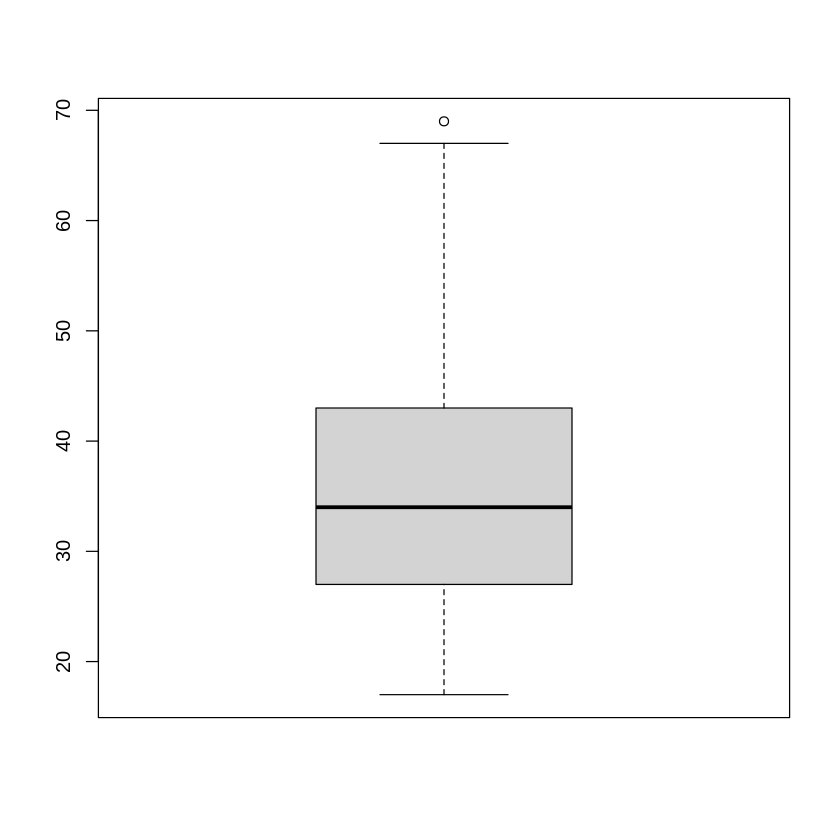

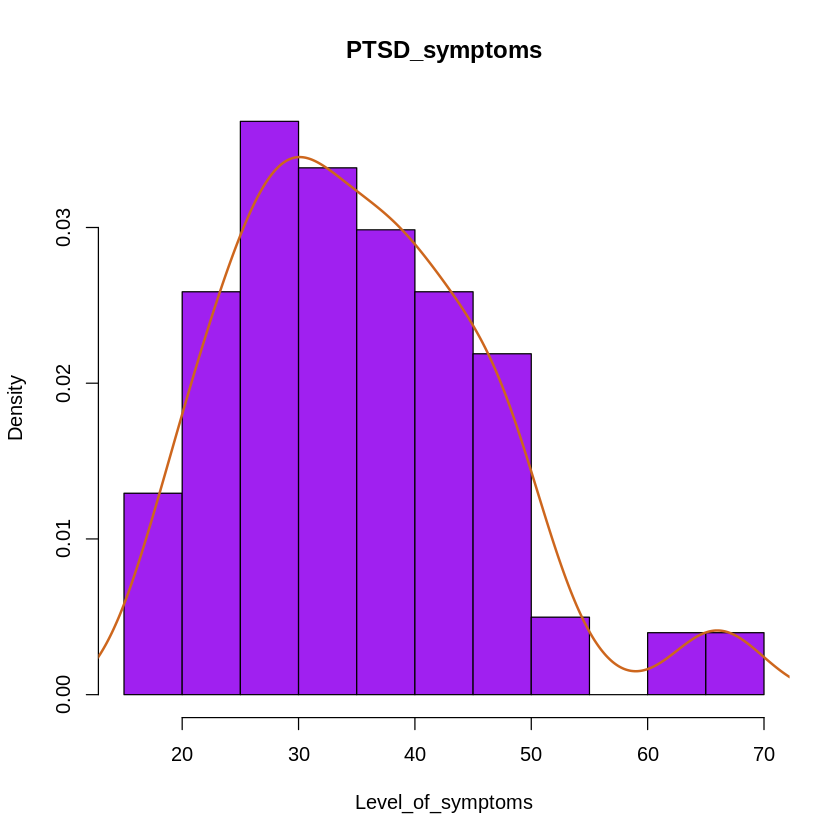

In [ ]:
boxplot(df_ptsr$PTSD_symptoms)
hist(df_ptsr$PTSD_symptoms, col="purple", border="black", prob = TRUE, xlab = "Level_of_symptoms", main = "PTSD_symptoms")
lines(density(df_ptsr$PTSD_symptoms), lwd = 2, col = "chocolate3")

Визуально распределение не очень похоже на нормальное. На боксплоте есть наблюдение, которое можно посчитать выбросом. Посмотрим на количество очень больших или малых значений, чтобы принять решение о дальнейшей работе с ними.

In [ ]:
table(df_ptsr$PTSD_symptoms)


17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 
 5  1  3  4  4  6  5  4  7  6  9  5 10  7  6  8  7  5  8  4  7  8  6  5  7  3 
43 44 45 46 47 48 49 50 51 52 53 55 63 65 67 69 
 7  5  4  4  7  2  7  2  1  2  1  1  1  3  3  1 

Максимальное значение - 69 - единственное наблюдение такой величины. Однако, рядом расположены значения 67 и 65 - по 3 наблюдения. Скорее всего, данные значения не являются ошибочными данными, присутствуют в рамках значений теста по оценке симптомов ПТСР, поэтому принято решение не удалять выбросы.



## Анализ признаков

**Разделим признаки на количественные и качественные.**

In [ ]:
df_c <- df_ptsr[c("Marital_status", "Education", "Income", "Cancer_stage", "Treatment_type", "Metastasis")]
df_q <- df_ptsr[c("Age", "Social_support", "Hope", "Resilience")]

Построим корреляционную матрицу количественных признаков для обобщения набора данных и анализа избыточности.   


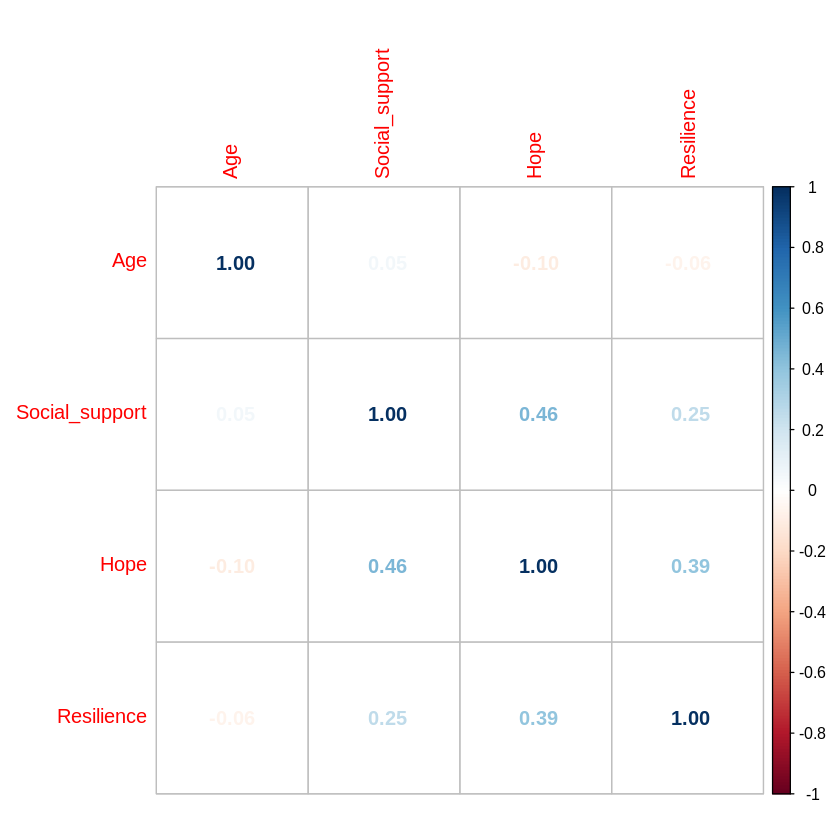

In [ ]:
corrplot(cor(df_q), method="number")

Коэффициенты корреляции не показали сильной связи между количественными переменными.

Оценим силу связи между категориальными признаками при помощи коэффициента неопределенности Гудмана и Краскала.

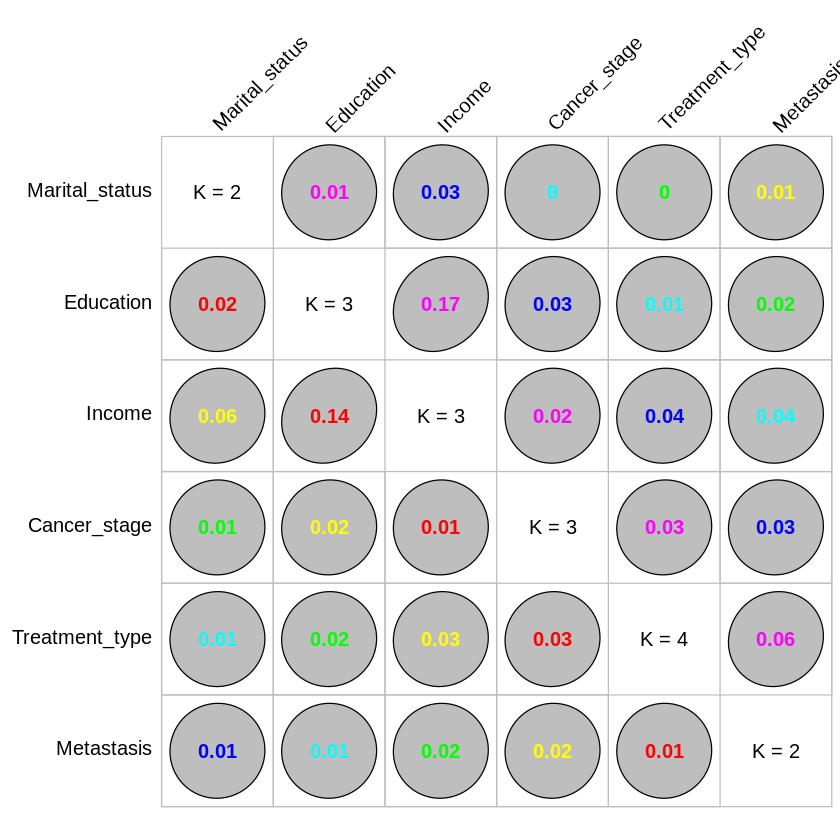

In [ ]:
plot(GKtauDataframe(df_c))

Сильных связей между категориальными признаками не выявлено.

Построим гистограмму распределения значений демографических признаков в связи с симптомами ПТСР.

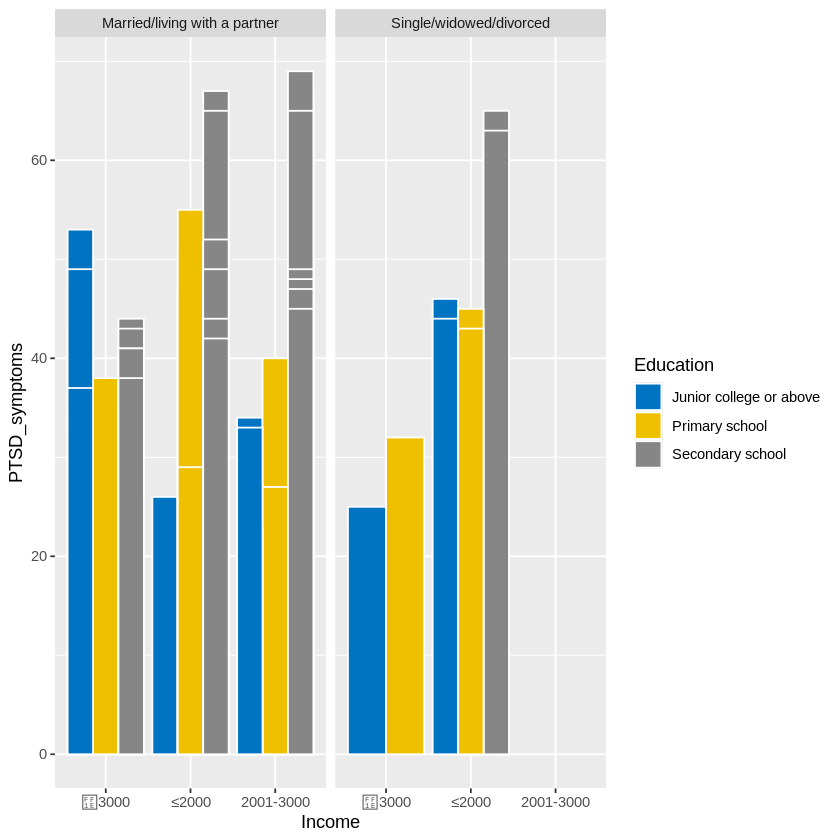

In [ ]:
ggplot(df_ptsr, aes(x = Income, y = PTSD_symptoms))+
  geom_bar(
    aes(fill = Education), stat = "identity", color = "white",
    position = position_dodge(0.9)
    )+
  facet_wrap(~Marital_status) +
  fill_palette("jco")

При анализе демографических признаков можем наблюдать следующие особенности:
- У пациентов, с доходами менее 3000, самые высокие значения целевой переменной среди тех, кто окончил среднюю школу.
- У одиноких людей с доходами менее 2000 наблюдаются самые высокие значения по шкале симптомов ПТСР по сравнению с другими одинокими людьми с таким же образованием. Среди пациентов в отношениях картина аналогична, кроме тех, кто обучался в колледже. Возможно, более высокая ступень образования более позитивно влияет на восприятие болезни, несмотря на низкий доход.  
- Среди тех, кто окончил начальную школу самые высокие значения по шкале 'PTSD_symptoms' наблюдаются у людей с доходом менее 2000, состоящих в отношениях.
- Среди тех, кто учился в колледже:
  - самые высокие значения по шкале 'PTSD_symptoms' наблюдаются у людей с доходом более 3000, состоящих в отношениях;
  - самые низкие значения симптомов ПТСР наблюдаются у одиноких людей с доходом более 3000 и людей в отношениях с доходом менее 2000 – эти значения являются самыми низкими среди всех групп наблюдений.


In [ ]:
df_ptsr %>% count(Marital_status, Education, Income)

Marital_status,Education,Income,n
<fct>,<fct>,<fct>,<int>
Married/living with a partner,Junior college or above,＞3000,13
Married/living with a partner,Junior college or above,≤2000,1
Married/living with a partner,Junior college or above,2001-3000,9
Married/living with a partner,Primary school,＞3000,2
Married/living with a partner,Primary school,≤2000,41
Married/living with a partner,Primary school,2001-3000,4
Married/living with a partner,Secondary school,＞3000,24
Married/living with a partner,Secondary school,≤2000,41
Married/living with a partner,Secondary school,2001-3000,48


В датасете больше всего пациентов со следующими характеристиками:
- состоящие в отношениях, окончившие среднюю школу, с доходом от 2001 до 3000 – 48 человек;
- состоящие в отношениях, окончившие среднюю школу, с доходом менее 2000 – 41 человек;
- состоящие в отношениях, окончившие начальную школу, с доходом менее 2000 – 41 человек.

Меньше всего наблюдений среди групп:
- состоящие в отношениях, обучавшиеся в колледже, с доходом менее 2000 – 1 человек;
- не в отношениях, окончившие среднюю школу, с доходом более 3000 - 1 человек;
- состоящие в отношениях, окончившие среднюю школу, с доходом более 3000 – 2 человека;
- не в отношениях, обучавшиеся в колледже, с доходом более 3000 - 2 человека;
- не в отношениях, обучавшиеся в колледже, с доходом менее 2000  - 2 человека.


Построим гистограмму распределения значений клинических признаков.

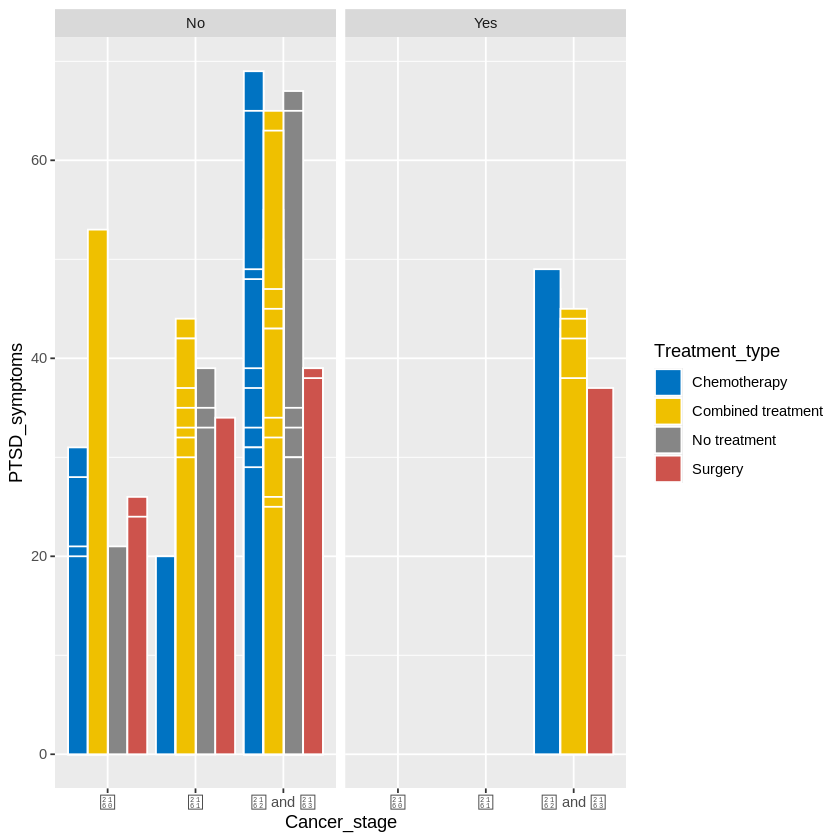

In [ ]:
ggplot(df_ptsr, aes(x = Cancer_stage, y = PTSD_symptoms))+
  geom_bar(
    aes(fill = Treatment_type), stat = "identity", color = "white",
    position = position_dodge(0.9)
    )+
  facet_wrap(~Metastasis) +
  fill_palette("jco")

У тех пациентов, кто имеет метастазы, наблюдаются 3 и 4 стадии рака. Самые высокие показатели симптомов ПТСР у тех, кто проходит химеотерапию (около 50); самые низкие у тех, кто лечится хирургически (менее 40). По сравнению с людьми, у которых метастазы не обнаружены, симптомы ПТСР у людей с метастазами проявляются меньше.

Среди пациентов, у которых метастазы не обнаружены:
- Самые высокие показатели 'PTSD_symptoms' у людей на 3 и 4 стадии: проходящих химеотерапию (около 70), без лечения (чуть ниже), на комбинированной терапии (около 65). В целом симптомы ПТСР на 3 и 4 стадии проявляются больше, чем у пациентов других стадий, если сравнивать их по типам лечения.
- Самые низкие показатели 'PTSD_symptoms' у людей, проходящих химеотерапию на 2 стадии, и людей без терапии на 1 стадии.


Визуализируем взаимосвязь между симптоматикой ПТСР и переменными, отвечающими за психологическое состояние.


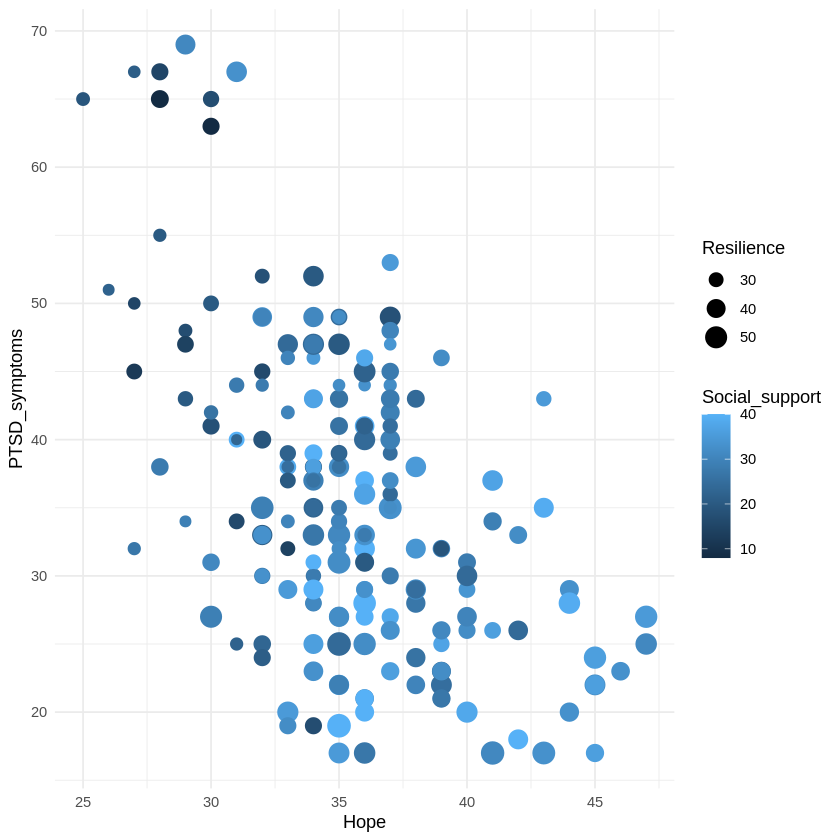

In [ ]:
 ggplot(df_ptsr) +
  aes(x = Hope, y = PTSD_symptoms, colour = Social_support, size = Resilience) +
  geom_point() +
  scale_color_gradient() +
  labs(
    y = "PTSD_symptoms",
    x = "Hope",
    color = "Social_support",
    size = "Resilience"
  ) +
  theme_minimal()

По графику можем предположить, что существует отрицательная зависимость между проявлением симптомов ПТСР и индексом надежды, так как график имеет наклон в левую сторону.

Также можем проследить отрицательную зависимость между проявлением симптомов ПТСР и оценкой социальной поддержки, так как более светлые точки с большими значениями чаще встречаются при низких значениях симптомов ПТСР.


# Формулирование гипотез

**Выдвинем следующие гипотезы:**
1. - H_0: нет различий между средними значениями баллов ПТСР у людей с разными стадиями рака.  
   - H_1: есть различия между средними значениями баллов ПТСР у людей с разными стадиями рака.


2. - H_0: при увеличении социальной поддержки показатель симптомов ПТСР не меняется.

    - H_1: при увеличении социальной поддержки происходит снижение проявлений симптомов ПТСР.


3. - H_0: нет связи между показателями надежды и стойкости и симптомами ПТСР.

    - H_1: существует связь между показателями надежды и стойкости и симптомами ПТСР.





# Разбиение данных на тренировочные и тестовые

Разобьем данные на тренировочные и тестовые.

In [ ]:
split = sample.split(df$PTSD_symptoms, SplitRatio = 0.8)
df = subset(df_ptsr, split == TRUE)
test_df = subset(df_ptsr, split == FALSE)

# Обучение и оптимизация моделей

## Линейная модель

Построим **линейную модель зависимости 'PTSR_symptomes' от количественных предикторов**, чтобы понять, какие переменные могут объяснить 'PTSR_symptomes'.

In [ ]:
model <- lm(PTSD_symptoms ~ Age + Social_support + Hope + Resilience, data = df)
summary(model)
AIC(model)


Call:
lm(formula = PTSD_symptoms ~ Age + Social_support + Hope + Resilience, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0223  -5.9840  -0.9717   5.8819  30.1672 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     88.2402     8.6081  10.251  < 2e-16 ***
Age              0.0190     0.0770   0.247   0.8054    
Social_support  -0.3051     0.1204  -2.534   0.0123 *  
Hope            -0.9836     0.2139  -4.599 8.65e-06 ***
Resilience      -0.2677     0.1099  -2.437   0.0159 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.192 on 158 degrees of freedom
Multiple R-squared:  0.3145,	Adjusted R-squared:  0.2971 
F-statistic: 18.12 on 4 and 158 DF,  p-value: 2.866e-12


[1] 1192.658

Существует **сильная отрицательная связь между симптомами ПТСР и индексом Надежды** (при увеличении Надежды на 1 единицу, симптомы ПТСР уменьшаются на 0.98 при постоянном уровне остальных переменных модели при p-value=0.000008).

Также существует **значительная отрицательная связь между симптомами ПТСР и оценкой Социальной поддержки** (при увеличении Социальной поддержки на единицу, симптомы ПТСР уменьшаются на 0.3 при p-value= 0.01).

Существует **значительная отрицательная связь между симптомами ПТСР и шкалой Устойчивости** (при увеличении Устойчивости на единицу, симптомы ПТСР уменьшаются на 0.26 при p-value= 0.01).

Мы **не отвергаем гипотезу об отсутствии связи между симптомами ПТСР и возрастом**, когда Надежда, Социальная поддержка и Устойчивость остаются постоянным (потому что p-value = 0.8. что больше 0.05).

Для дальнейшей работы используем оценку модели при помощи информационного критерия Акаике (AIC), его значение для этой модели 1192.6582.

Построим графики связи между переменными, включенными в модель, чтобы визуально оценить силу и характер связи.




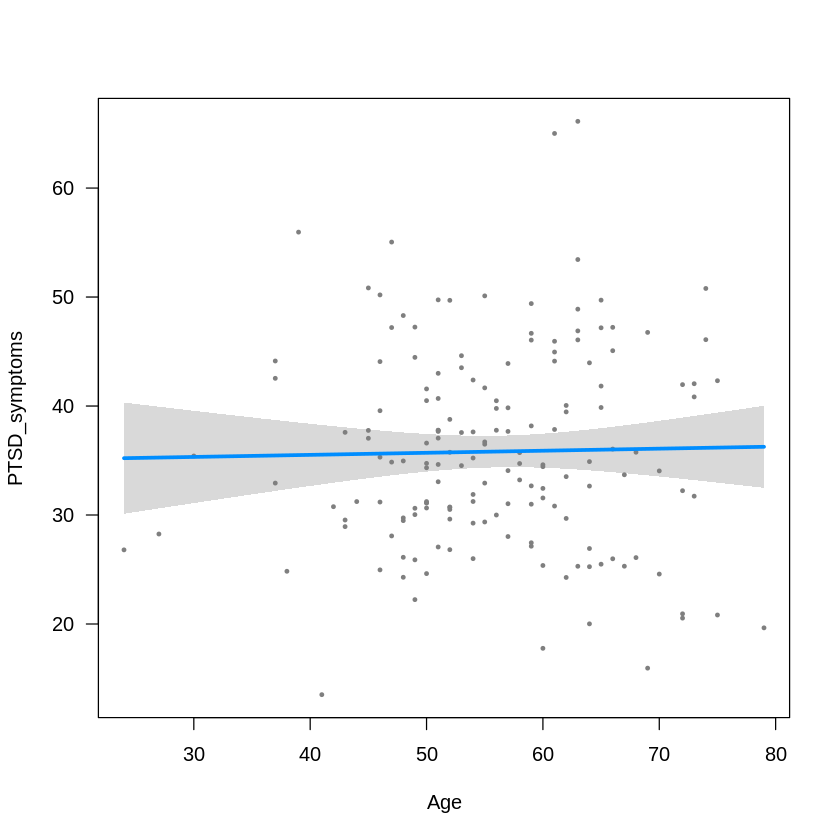

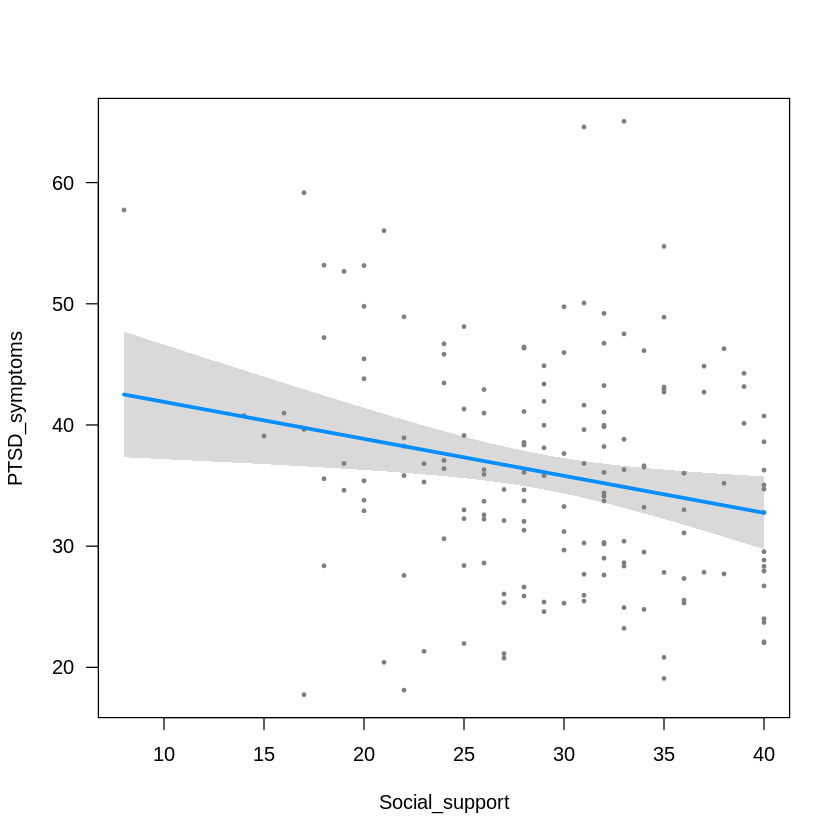

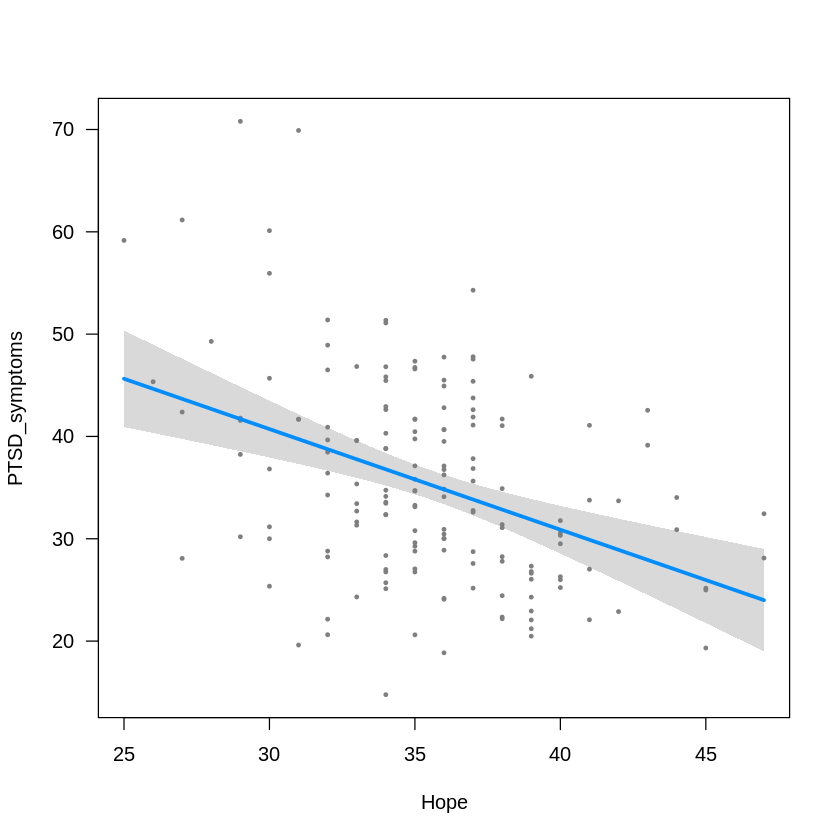

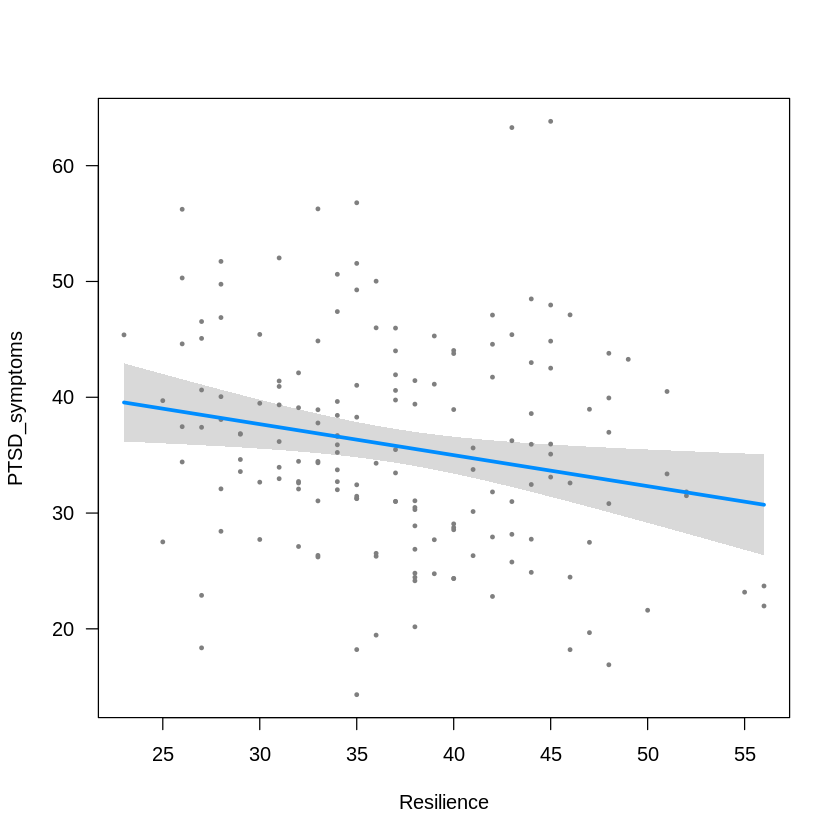

In [ ]:
visreg(model)

По графикам можно описать зависимость между предиктором и целевой переменной. Наклон показывает направление и силу влияния X на Y. Мы убеждаемся, что на 'PTSR_symptomes' возраст не оказывает значимого влияния, а социальная поддержка, индекс надежды и устойчивость снижает симптомы ПТСР. Доверительные интервалы достаточно узкие, что указывает на точность оценки.

Проверим **условия применимости модели**.

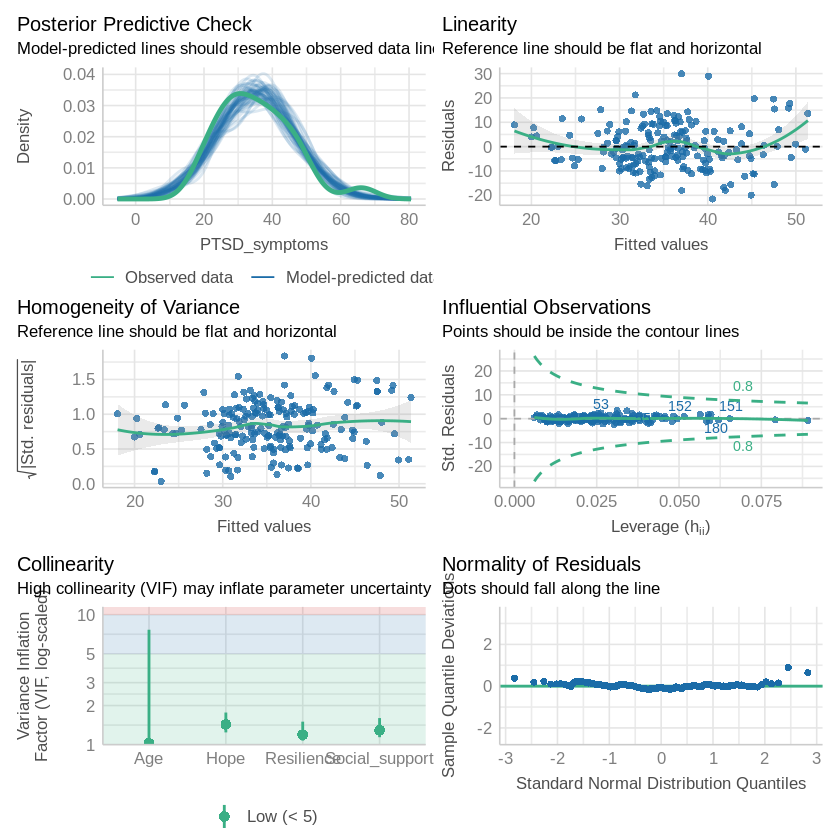

In [ ]:
check_model(model)

Визуальная оценка позволяет утверждать следующее:

- Распределение приближено к нормальному.

- Распределение остатков приближено к нормальному, за исключением нескольких точек, отклоняющихся от прямой, но учитывая то, что количество наблюдений достаточно велико, можно предположить, что тесты коэффициентов (приблизительно) действительны.

- Визуально однородность дисперсии соблюдается.

- Мультиколлинеарность низкая, все значения ниже 10.

- Выбросы отсутствуют.

- Линейность неидеальна, поэтому проверим каждую независимую переменную дополнительно.


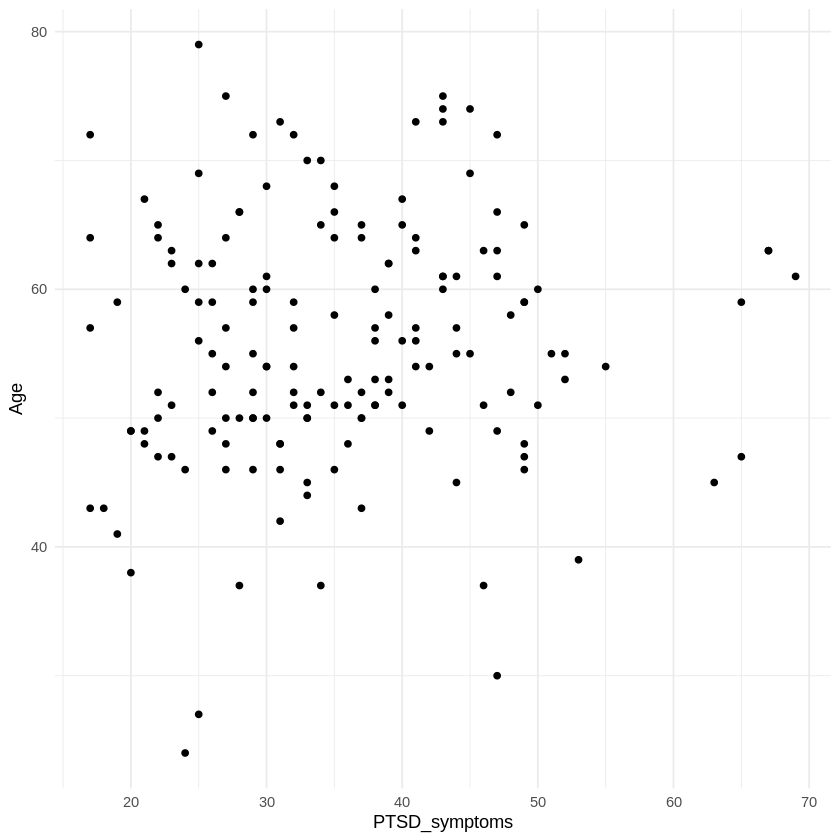

In [ ]:
ggplot(df, aes(x = PTSD_symptoms, y = Age)) +
  geom_point() +
  theme_minimal()

Вероятно, зависимость между возрастом и симптомами ПТСР нелинейна, что может быть причиной небольшого дефекта линейности модели.

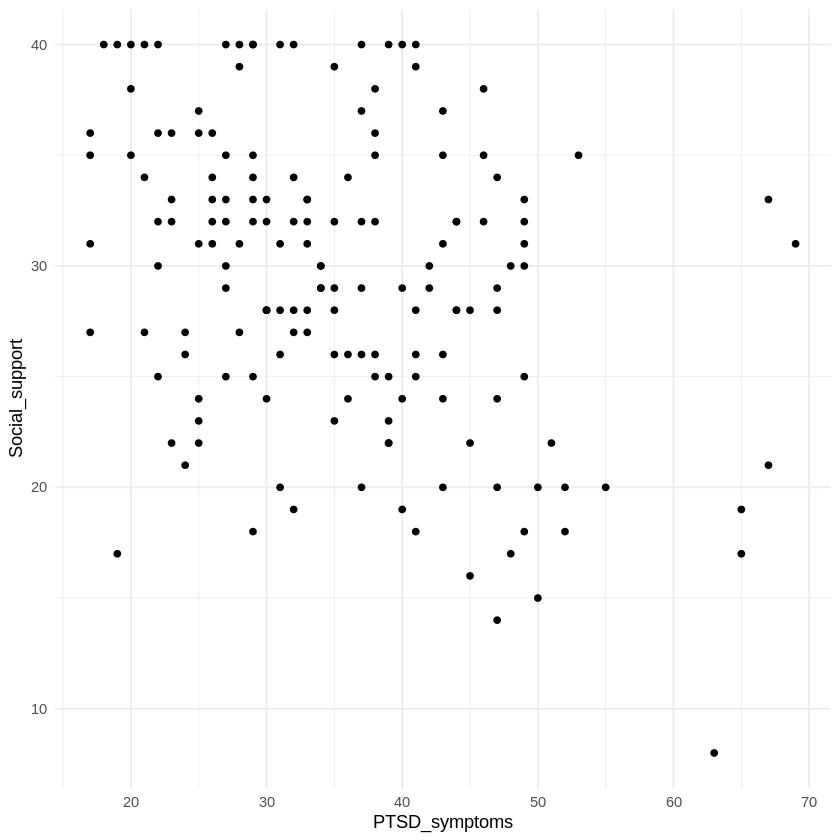

In [ ]:
ggplot(df, aes(x = PTSD_symptoms, y = Social_support)) +
  geom_point() +
  theme_minimal()

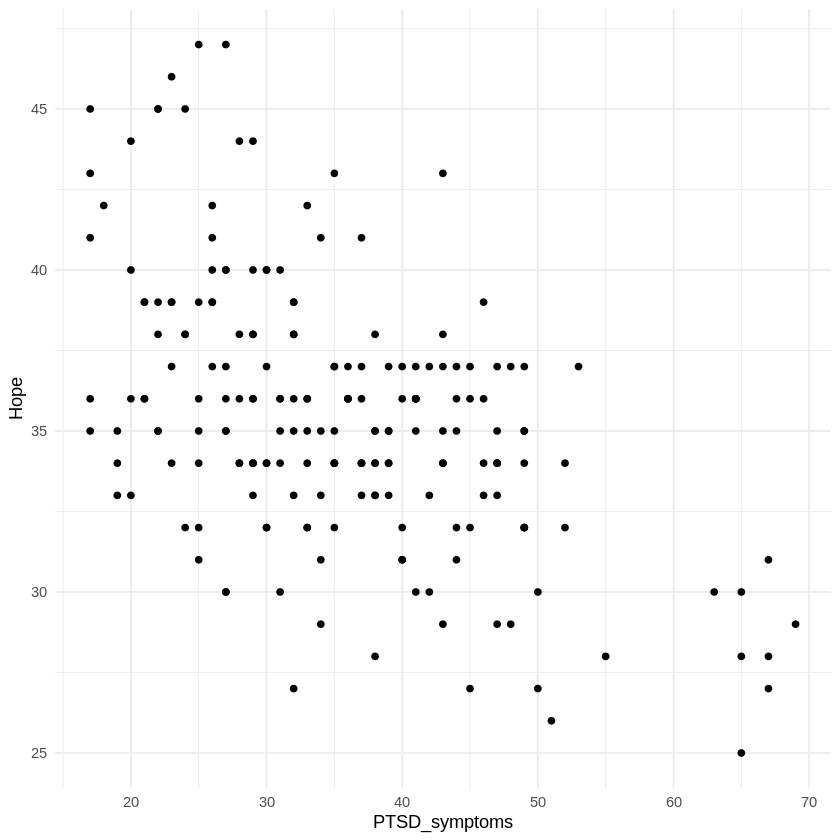

In [ ]:
ggplot(df, aes(x = PTSD_symptoms, y = Hope)) +
  geom_point() +
  theme_minimal()

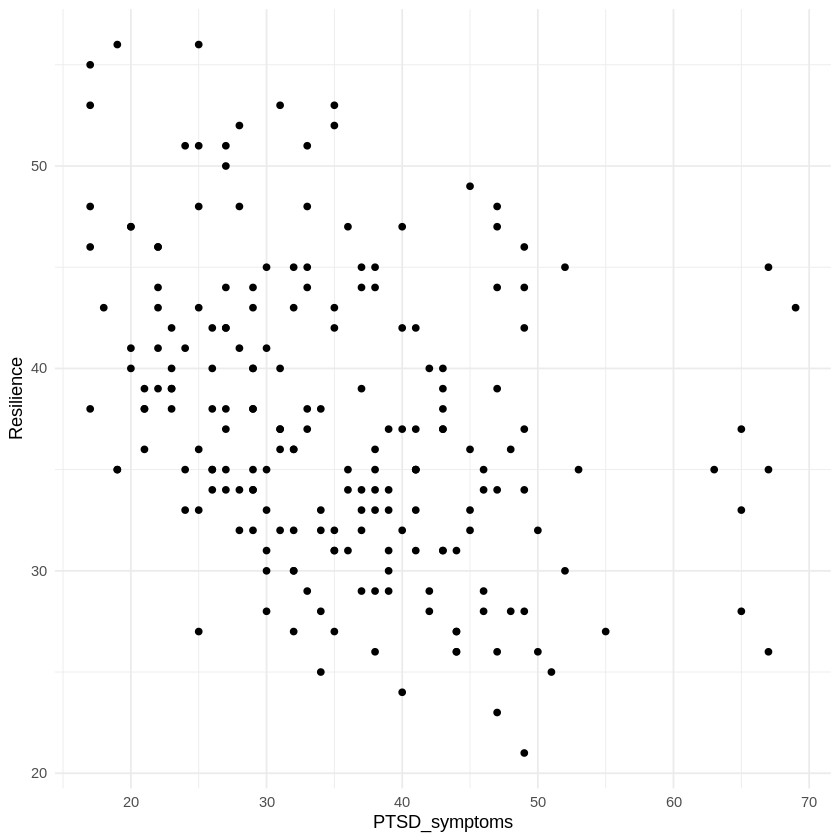

In [ ]:
ggplot(df, aes(x = PTSD_symptoms, y = Resilience)) +
  geom_point() +
  theme_minimal()

У данной модели **предиктор с самым большим по модулю коэффициентом** - индекс Надежды (Hope).

In [ ]:
model_Hope <- lm(PTSD_symptoms ~ Hope, data = df)
summary(model_Hope)
AIC(model_Hope)


Call:
lm(formula = PTSD_symptoms ~ Hope, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.1405  -7.4504  -0.2817   6.2398  25.3379 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  84.4538     6.6459  12.708  < 2e-16 ***
Hope         -1.3804     0.1862  -7.413 6.62e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.496 on 161 degrees of freedom
Multiple R-squared:  0.2545,	Adjusted R-squared:  0.2498 
F-statistic: 54.95 on 1 and 161 DF,  p-value: 6.622e-12


[1] 1200.34

Критерий Акаике при использовании только одного предиктора Hope увеличился по сравнению с предыдущей моделью.

Визуализируем результат обучения модели.

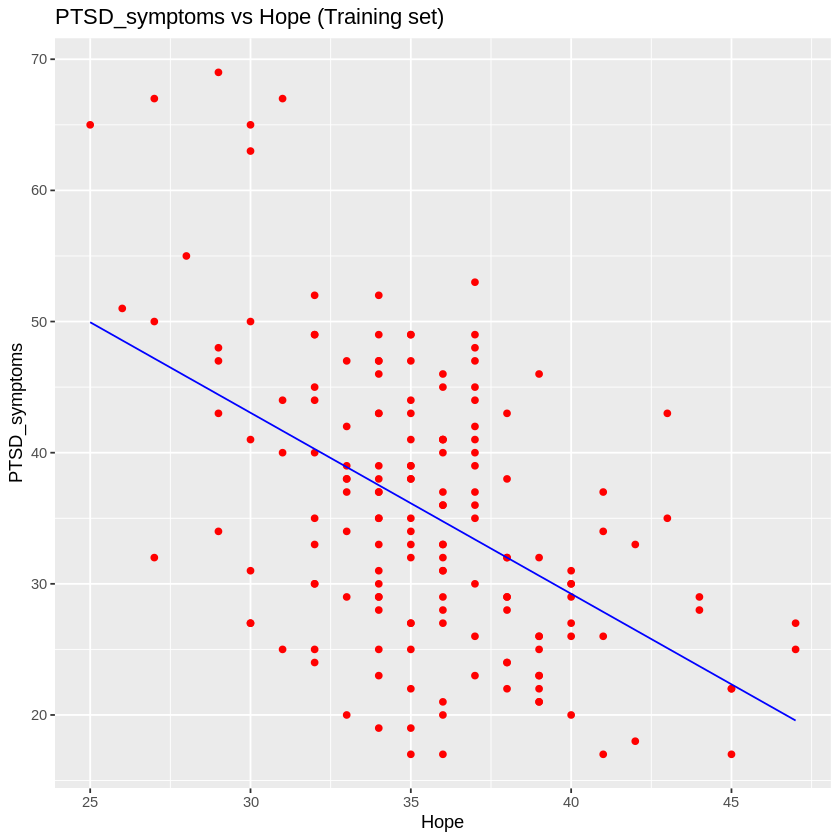

In [ ]:
ggplot() + geom_point(aes(x = df$Hope,
                          y = df$PTSD_symptoms), colour = 'red') +
  geom_line(aes(x = df$Hope,
                y = predict(model_Hope, newdata = df)), colour = 'blue') +

  ggtitle('PTSD_symptoms vs Hope (Training set)') +
  xlab('Hope') +
  ylab('PTSD_symptoms')

Проверим, как модель отработает на тестовых данных.

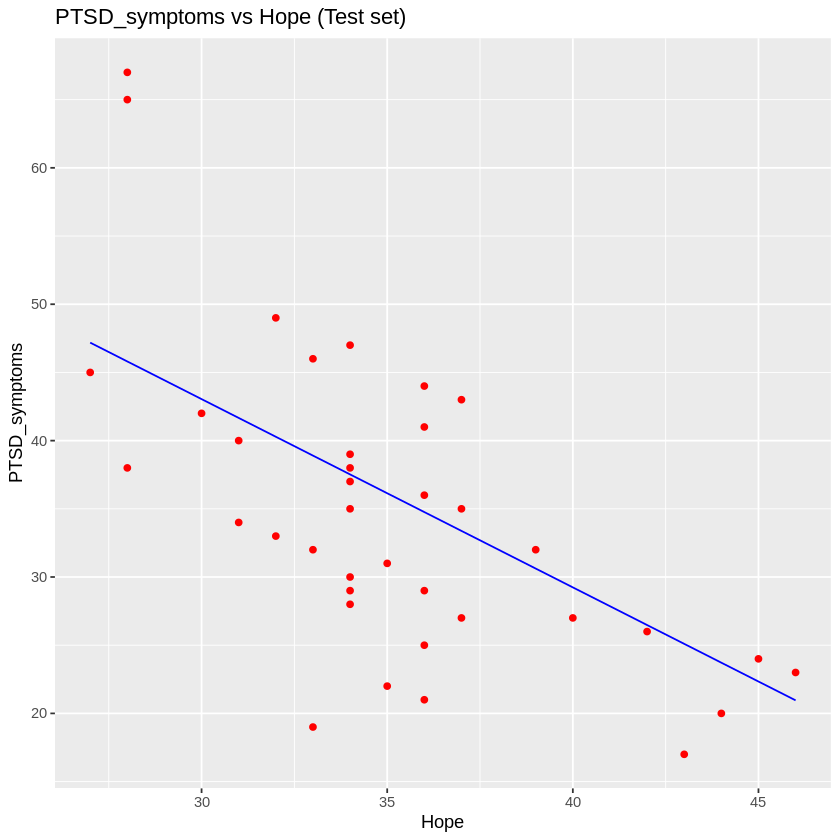

In [ ]:
ggplot() + geom_point(aes(x = test_df$Hope, y = test_df$PTSD_symptoms),
             colour = 'red') +
  geom_line(aes(x = test_df$Hope,
                y = predict(model_Hope, newdata = test_df)),
            colour = 'blue') +
  ggtitle('PTSD_symptoms vs Hope (Test set)') +
  xlab('Hope') +
  ylab('PTSD_symptoms')

Визуально модель работает корректно. Проверим **условия применимости модели** зависимости симптомов ПТСР от индекса Надежды.

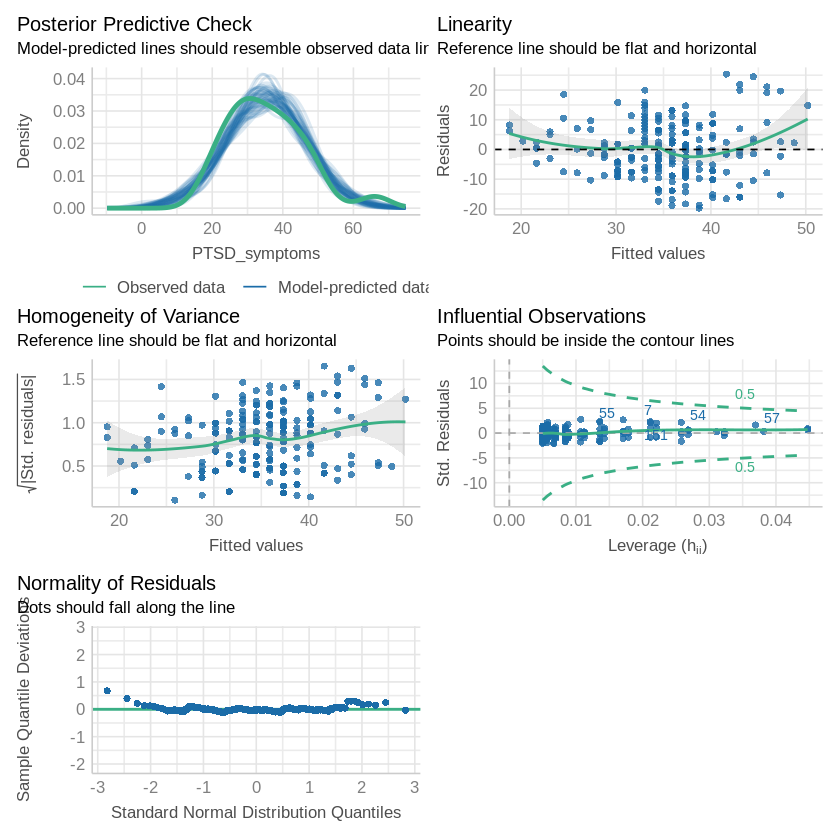

In [ ]:
check_model(model_Hope)

Распределение приближено к нормальному. Остатки почти полностью распределены нормально, за исключением нескольких точек в начале и конце. Визуально однородность дисперсии соблюдается с погрешностями. Выбросы отсутствуют. Линейность под вопросом, так как линия искривляется в середине и возвышается на концах.

Попробуем **улучшить модель**, добавив еще одну переменную со вторым по модулю коэффициентом - 'Social_support'.


In [ ]:
model_1 <- lm(PTSD_symptoms ~ Hope + Social_support, data = df)
summary(model_1)
AIC(model_1)


Call:
lm(formula = PTSD_symptoms ~ Hope + Social_support, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.2757  -5.9157  -0.6659   6.0142  27.6040 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     85.8902     6.5331  13.147  < 2e-16 ***
Hope            -1.1460     0.2012  -5.697  5.7e-08 ***
Social_support  -0.3324     0.1201  -2.768   0.0063 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.305 on 160 degrees of freedom
Multiple R-squared:  0.2885,	Adjusted R-squared:  0.2797 
F-statistic: 32.45 on 2 and 160 DF,  p-value: 1.485e-12


[1] 1194.714

Критерий Акаике снизился, что показывает движение в верном направлении. Добавим еще одну значимую переменную - 'Resilience'.

In [ ]:
model_2 <- lm(PTSD_symptoms ~ Hope + Social_support + Resilience, data = df)
summary(model_2)
AIC(model_2)


Call:
lm(formula = PTSD_symptoms ~ Hope + Social_support + Resilience, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.2692  -6.0839  -0.9041   6.1871  30.2324 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     89.5948     6.6109  13.553  < 2e-16 ***
Hope            -0.9957     0.2075  -4.800 3.64e-06 ***
Social_support  -0.3010     0.1189  -2.531   0.0123 *  
Resilience      -0.2672     0.1095  -2.440   0.0158 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.164 on 159 degrees of freedom
Multiple R-squared:  0.3142,	Adjusted R-squared:  0.3013 
F-statistic: 24.29 on 3 and 159 DF,  p-value: 5.437e-13


[1] 1190.721

Критерий Акаике уменьшился до 1190.721. Попробуем построить модель только с  факторными переменными.

In [ ]:
model3 <- lm(PTSD_symptoms ~ Marital_status + Education + Income + Cancer_stage + Treatment_type + Metastasis, data = df)
summary(model3)
AIC(model3)


Call:
lm(formula = PTSD_symptoms ~ Marital_status + Education + Income + 
    Cancer_stage + Treatment_type + Metastasis, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.636  -7.773  -0.277   5.830  32.053 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            26.6080     3.5945   7.402 8.71e-12 ***
Marital_statusSingle/widowed/divorced   0.1556     3.2124   0.048   0.9614    
EducationPrimary school                 1.4164     3.4245   0.414   0.6798    
EducationSecondary school               0.1483     2.8769   0.052   0.9590    
Income≤2000                             4.4106     2.5963   1.699   0.0914 .  
Income2001-3000                         4.7215     2.6441   1.786   0.0762 .  
Cancer_stageⅡ                           4.1291     3.7501   1.101   0.2726    
Cancer_stageⅢ and Ⅳ                     5.4694     2.3437   2.334   0.0209 *  
Treatment_typeCombined treatment        0.7827

[1] 1254.13

Критерий Акаике большой. Попробуем оставить только значимые факторные переменные.

In [ ]:
model4 <- lm(PTSD_symptoms ~ Income + Cancer_stage, data = df)
summary(model4)
AIC(model4)


Call:
lm(formula = PTSD_symptoms ~ Income + Cancer_stage, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.948  -7.941  -0.935   6.373  32.065 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           27.577      2.567  10.742   <2e-16 ***
Income≤2000            4.743      2.192   2.164   0.0320 *  
Income2001-3000        3.731      2.411   1.547   0.1238    
Cancer_stageⅡ          4.030      3.561   1.132   0.2595    
Cancer_stageⅢ and Ⅳ    5.628      2.197   2.562   0.0113 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.72 on 158 degrees of freedom
Multiple R-squared:  0.0673,	Adjusted R-squared:  0.04369 
F-statistic:  2.85 on 4 and 158 DF,  p-value: 0.02571


[1] 1242.85

Критерий Акаике снижается, но все еще достаточно большой по сравнению с ранее полученными значениями. Попробуем взять в модель значимые количественные и качественные предикторы.

In [ ]:
model5 <- lm(PTSD_symptoms ~ Income + Cancer_stage + Hope + Social_support + Resilience, data = df)
summary(model5)
AIC(model5)


Call:
lm(formula = PTSD_symptoms ~ Income + Cancer_stage + Hope + Social_support + 
    Resilience, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4701  -6.8843  -0.4208   5.3506  30.9927 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          82.8693     7.6055  10.896  < 2e-16 ***
Income≤2000           2.7811     1.8796   1.480  0.14100    
Income2001-3000       0.4643     2.1192   0.219  0.82687    
Cancer_stageⅡ         2.9275     3.0228   0.968  0.33432    
Cancer_stageⅢ and Ⅳ   3.5746     1.9004   1.881  0.06185 .  
Hope                 -0.9176     0.2154  -4.261 3.52e-05 ***
Social_support       -0.3104     0.1180  -2.630  0.00939 ** 
Resilience           -0.2714     0.1099  -2.468  0.01466 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.076 on 155 degrees of freedom
Multiple R-squared:  0.3443,	Adjusted R-squared:  0.3147 
F-statistic: 11.63 on 7 and 155 DF,  

[1] 1191.403

Критерий Акаике 1191.4031, что является самым низким полученным значением. Выведем коэффициенты модели.

In [ ]:
model_parameters(model5, summary = TRUE)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),82.8693200,7.6055261,0.95,67.8454616,97.89317827,10.8959353,155,6.969487e-21
Income≤2000,2.7811283,1.8795869,0.95,-0.9317834,6.49403995,1.4796487,155,1.409966e-01
Income2001-3000,0.4642879,2.1192215,0.95,-3.7219949,4.65057074,0.2190842,155,8.268727e-01
Cancer_stageⅡ,2.9274697,3.0227798,0.95,-3.0436906,8.89863010,0.9684694,155,3.343187e-01
Cancer_stageⅢ and Ⅳ,3.5745809,1.9004029,0.95,-0.1794504,7.32861229,1.8809596,155,6.185300e-02
Hope,-0.9176285,0.2153645,0.95,-1.3430568,-0.49220013,-4.2608152,155,3.522172e-05
Social_support,-0.3103977,0.1180140,0.95,-0.5435211,-0.07727435,-2.6301767,155,9.394851e-03
Resilience,-0.2713625,0.1099341,0.95,-0.4885249,-0.05420002,-2.4684098,155,1.465770e-02


In [ ]:
print(coef(model5))

        (Intercept)         Income≤2000     Income2001-3000       Cancer_stageⅡ 
         82.8693200           2.7811283           0.4642879           2.9274697 
Cancer_stageⅢ and Ⅳ                Hope      Social_support          Resilience 
          3.5745809          -0.9176285          -0.3103977          -0.2713625 


В ходе построения модели **выявлена сильная отрицательная связь между симптомами ПТСР и переменными, характеризующими психологическое состояние**: индекс Надежды, Социальная поддержка и Устойчивость. Также **прослеживается положительная связь между проявлением ПТСР и 3 и 4 стадиями рака**.



## Дисперсионный анализ

Дополнительно проведем **дисперсионный анализ зависимости симптомов ПТСР от стадии рака**, чтобы определить, есть ли статистически значимая разница между симптомами ПТСР на разных стадиях рака.


Переменная-предиктор — 'Cancer_stage', переменная-отклик — 'PTSR_symptomes'.

In [ ]:
df$Cancer_stage <- factor(df$Cancer_stage)

In [ ]:
df %>% count(Cancer_stage)

Cancer_stage,n
<fct>,<int>
Ⅰ,30
Ⅱ,13
Ⅲ and Ⅳ,120


In [ ]:
df %>%
  group_by(factor(Cancer_stage)) %>%
  summarise (mean = mean(PTSD_symptoms),
  sd = sd(PTSD_symptoms))

factor(Cancer_stage),mean,sd
<fct>,<dbl>,<dbl>
Ⅰ,31.00000,9.112326
Ⅱ,35.23077,6.084870
Ⅲ and Ⅳ,36.65000,11.542141


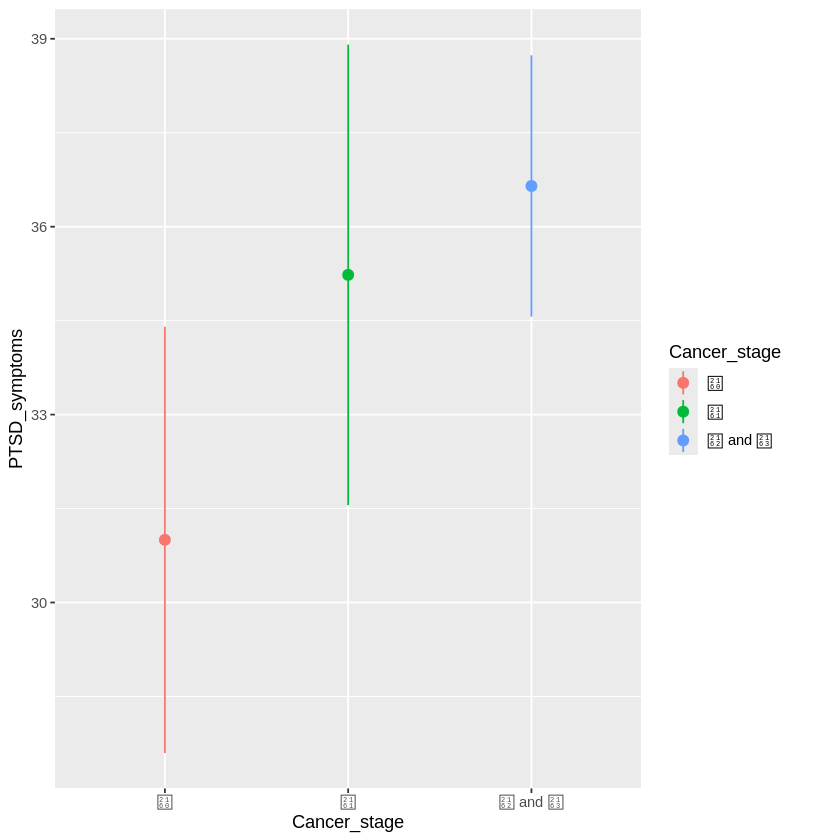

In [ ]:
ggplot(df, aes(x = Cancer_stage, y = PTSD_symptoms, colour = Cancer_stage)) + stat_summary(fun.data = "mean_cl_normal")

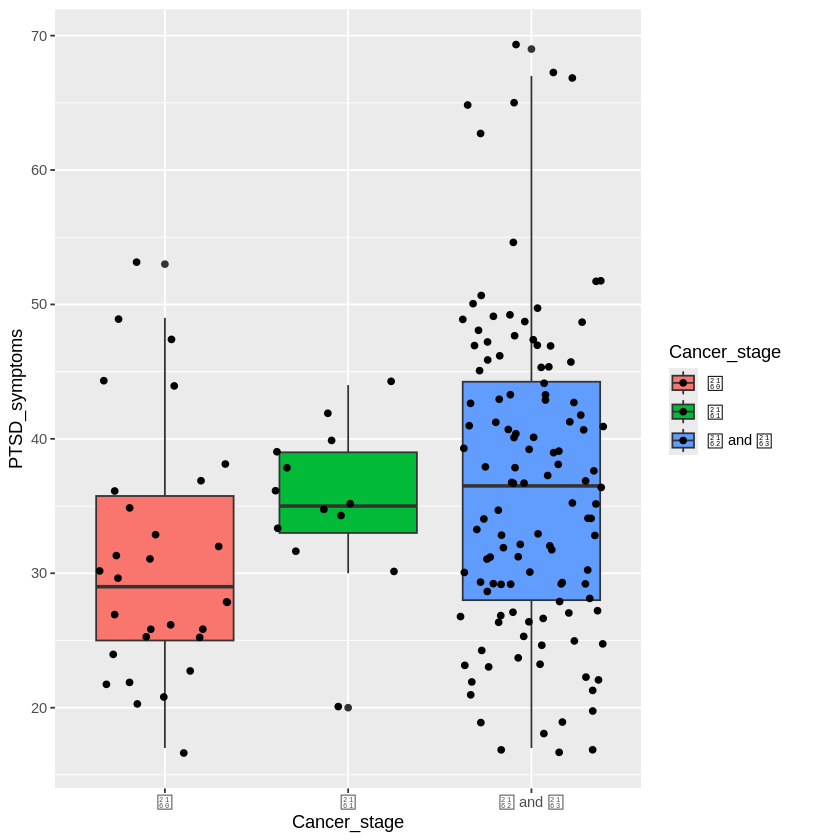

In [ ]:
ggplot(df, aes(x = Cancer_stage, y = PTSD_symptoms, fill = Cancer_stage)) + geom_boxplot() + geom_jitter()

Данные между группами распределены неравномерно. При построении доверительных интервалов можно предположить, что группы с разными стадиями рака отличаются между собой. По графику можно предположить, что среднее проявление ПТСР ниже у людей с первой стадией рака. Стандартное отклонение выше для 3 и 4 стадии по сравнению с 1 и 2. Нельзя сказать, что дисперсия равномерна.


Построим однофакторную модель Anova.

In [ ]:
model_cancer_stage <- lm(PTSD_symptoms ~ Cancer_stage, data = df)
summary(model_cancer_stage)


Call:
lm(formula = PTSD_symptoms ~ Cancer_stage, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-19.65  -7.65  -0.65   6.35  32.35 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           31.000      1.974  15.703   <2e-16 ***
Cancer_stageⅡ          4.231      3.590   1.178   0.2404    
Cancer_stageⅢ and Ⅳ    5.650      2.207   2.560   0.0114 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.81 on 160 degrees of freedom
Multiple R-squared:  0.0394,	Adjusted R-squared:  0.02739 
F-statistic: 3.281 on 2 and 160 DF,  p-value: 0.04014


In [ ]:
anova_mod <- Anova(model_cancer_stage)
anova_mod

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Cancer_stage,767.1408,2,3.280902,0.0401389
Residuals,18705.6077,160,NA,NA


Из выходных данных модели мы видим, что **существует статистически значимая разница между средними значениями ПТСР на разных стадиях рака при уровне значимости 0.05**.

Далее **необходимо проверить, выполняются ли предположения модели, чтобы результаты считались надежными**.

Попробуем визуально оценить нормальность данных.

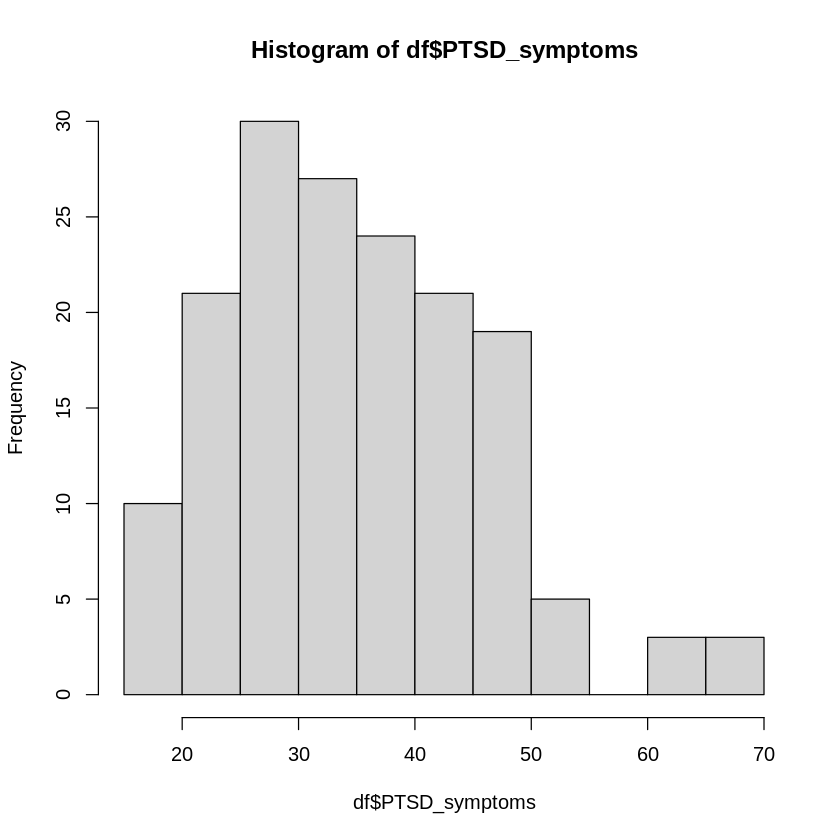

In [ ]:
hist(df$PTSD_symptoms)

[1] 41 43

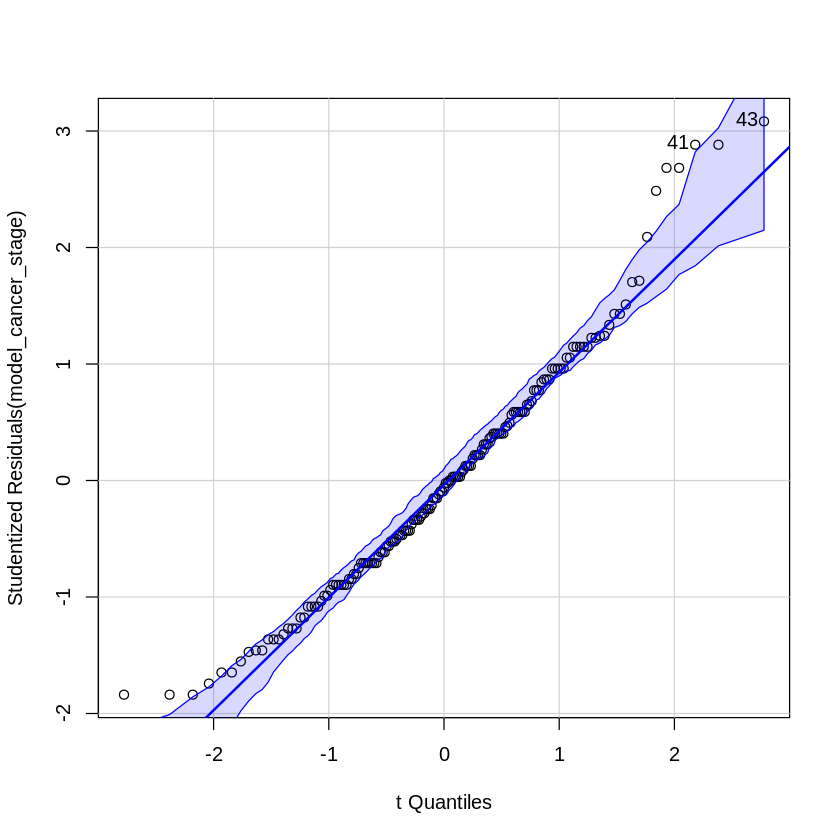

In [ ]:
qqPlot(model_cancer_stage)

По гистограмме мы видим, что распределение не очень похоже на нормальное. На qq-графике заметно отклонение от линии вдоль концов, что также может указывать на то, что данные не распределены нормально.

В целом однофакторный дисперсионный анализ считается достаточно устойчивым к нарушениям предположения о нормальности при достаточно большом объеме выборок.

Для проверки гомогенности дисперсий выполним тест Левена.

In [ ]:
leveneTest(PTSD_symptoms ~ Cancer_stage, data = df)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,4.583268,0.01159958
,160,NA,NA


Значение p-value = 0.01, при уровне значимости 0.05, мы не можем принять нулевую гипотезу о том, что дисперсии одинаковы для трех групп.

Для дополнительной проверки используем тест Бартлетта.

In [ ]:
bartlett.test(PTSD_symptoms ~ Cancer_stage, data = df)


	Bartlett test of homogeneity of variances

data:  PTSD_symptoms by Cancer_stage
Bartlett's K-squared = 8.0176, df = 2, p-value = 0.01816


Значение p-value = 0.01, при уровне значимости 0.05, мы не можем принять нулевую гипотезу, однако при уровне значимости 0.01 нулевая гипотеза не может быть отвергнута.

В целом, однофакторный дисперсионный анализ считается достаточно устойчивым к нарушениям предположения о равных дисперсиях, если каждая группа имеет одинаковый размер выборки. Но в нашем случае размер групп разный, поэтому дополнительно используем критерий Краскала-Уоллиса.

In [ ]:
kruskal.test(PTSD_symptoms ~ Cancer_stage, data = df)


	Kruskal-Wallis rank sum test

data:  PTSD_symptoms by Cancer_stage
Kruskal-Wallis chi-squared = 9.4984, df = 2, p-value = 0.008659


Из выходных данных мы видим, что критерий Краскала-Уоллиса подтверждает выявленную ранее разницу между средними значениями ПТСР на разных стадиях рака при уровне значимости 0.05.

Выявим, какие именно группы отличаются между собой.

In [ ]:
post_hoch <- glht(model_cancer_stage, linfct = mcp(Cancer_stage = "Tukey"))
summary(post_hoch)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = PTSD_symptoms ~ Cancer_stage, data = df)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)  
Ⅱ - Ⅰ == 0          4.231      3.590   1.178   0.4577  
Ⅲ and Ⅳ - Ⅰ == 0    5.650      2.207   2.560   0.0288 *
Ⅲ and Ⅳ - Ⅱ == 0    1.419      3.157   0.450   0.8913  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


В результате мы видим, что есть **различия в симптомах ПТСР между группой с 3 и 4 стадией рака и группой с 1 стадией рака**.

# Вывод


**В процессе исследования было выполнено следующее:**
- Проведен разведочный анализ данных. Данные не содержат пропусков.
- Проведен анализ количественных и категориальных признаков.
- Проведен анализ целевой переменной.
- Проверены гипотезы о связи предикторов и целевой переменной.
- Реализована линейная модель зависимости симптомов ПТСР от количественных предикторов.
- Проведен дисперсионный анализ зависимости симптомов ПТСР от стадии рака.

**По результатам исследования установлено:**
- Не выявлено сильной связи между количественными и категориальными переменными.
- Анализ целевой переменной показал, что она распределена ненормально.
- Коэффициенты корреляции Пирсона не показали сильной связи между количественными переменными. Сильных связей между категориальными признаками при помощи коэффициента неопределенности Гудмана и Краскала не выявлено.
- При графическом анализе демографических признаков в связи с симптомами ПТСР было выявлено следующее:
  - У пациентов, с доходами менее 3000, самые высокие значения 'PTSD_symptoms' среди тех, кто окончил среднюю школу.
  - Среди тех, кто окончил начальную школу самые высокие значения по шкале 'PTSD_symptoms' наблюдаются у людей с доходом менее 2000, состоящих в отношениях.
  - У одиноких людей с доходами менее 2000 наблюдаются самые высокие значения по шкале симптомов ПТСР по сравнению с другими одинокими людьми с таким же образованием. Среди пациентов в отношениях картина аналогична, кроме тех, кто обучался в колледже.
  - Среди тех, кто учился в колледже самые высокие значения по шкале 'PTSD_symptoms' наблюдаются у людей с доходом более 3000, состоящих в отношениях. Самые низкие значения симптомов ПТСР среди тех, кто учился в колледже, наблюдаются у одиноких людей с доходом более 3000 и людей в отношениях с доходом менее 2000 – эти значения являются самыми низкими среди всех групп наблюдений.
- При графическом анализе клинических признаков в связи с симптомами ПТСР было выявлено следующее:
  - У тех пациентов, кто имеет метастазы, наблюдаются 3 и 4 стадии рака. Самые высокие показатели симптомов ПТСР у тех, кто проходит химеотерапию (около 50); самые низкие у тех, кто лечится хирургически (менее 40). По сравнению с людьми, у которых метастазы не обнаружены, симптомы ПТСР у людей с метастазами проявляются меньше.
  - Среди пациентов, у которых метастазы не обнаружены, самые высокие показатели 'PTSD_symptoms' у людей на 3 и 4 стадии, если сравнивать их по типам лечения.
  - Самые низкие показатели 'PTSD_symptoms' у людей, проходящих химеотерапию на 2 стадии, и людей без терапии на 1 стадии.
- Выдвинуты следующие гипотезы:
  1. - H_0: нет различий между средними значениями баллов ПТСР у людей с разными стадиями рака.  
     - H_1: есть различия между средними значениями баллов ПТСР у людей с разными стадиями рака.

     Подтвердилась альтернативная гипотеза: есть различия между средними значениями баллов ПТСР у людей с разными стадиями рака. Найдены  различия в симптомах ПТСР между группой с 3 и 4 стадией рака и группой с 1 стадией рака.

  2. - H_0: при увеличении социальной поддержки показатель симптомов ПТСР не меняется.

     - H_1: при увеличении социальной поддержки происходит снижение проявлений симптомов ПТСР.
    
     Подтвердилась альтернативная гипотеза: при увеличении социальной поддержки происходит снижение проявлений симптомов ПТСР. При увеличении Социальной поддержки на единицу, симптомы ПТСР уменьшаются на 0.3 при p-value= 0.01.
    

  3. - H_0: нет связи между показателями надежды и стойкости и симптомами ПТСР.

     - H_1: существует связь между показателями надежды и стойкости и симптомами ПТСР.

     Подтвердилась альтернативная гипотеза: есть связь между показателями надежды и стойкости и симптомами ПТСР. При увеличении Надежды на 1 единицу, симптомы ПТСР уменьшаются на 0.98 при постоянном уровне остальных переменных модели при p-value=0.000008.

- Реализована линейная модель зависимости 'PTSR_symptomes' от количественных предикторов, чтобы понять, какие переменные объясняют 'PTSR_symptomes'. В ходе построения модели выявлена сильная отрицательная связь между симптомами ПТСР и переменными, характеризующими психологическое состояние: индекс Надежды, Социальная поддержка и Устойчивость.
- Проведен дисперсионный анализ зависимости симптомов ПТСР от стадии рака, чтобы определить, есть ли статистически значимая разница между симптомами ПТСР на разных стадиях. Было определено, что существует статистически значимая разница между средними значениями ПТСР на разных стадиях рака при уровне значимости 0.05. При помощи post hoch (тест Тьюки) установлено, что есть различия в симптомах ПТСР между группой с 3 и 4 стадией рака и группой с 1 стадией рака.

**По результам исследования можно сформулировать рекомендации для клинической практики, исследований и психосоциальной поддержки пациентов:**

1.	Рекомендуется внедрить рутинный скрининг на симптомы ПТСР при каждом визите к онкологу, используя шкалы надежды и устойчивости. Особое внимание необходимо уделить пациентам 3 и 4 стадии - у них более высокий риск возникновения ПТСР.

2.	Целесообразно  провести обучение для онкологов на распознавание симптомов ПТСР. Медсестрам необходимо владеть базовыми навыками психологической поддержки.

3.	Рекомендовать пациентам профессиональную психологическую и психотерапевтическую помощь для повышения индекса надежды и устойчивости. Критериями для обращения за помощью могут выступать:  
  - высокие баллы по шкале ПТСР (более 44 по PCL-C);
  - низкий индекс надежды, устойчивости или социальной поддержки;
  - 3 и 4 стадия заболевания.

4.	Необходимо усилить социальную поддержку пациентов, организуя для них группы поддержки и привлекая социальных работников. Также можно рекомендовать родственникам  программы психообразования.
